### Import modules

In [7]:
from bhc import bhclust

In [6]:
from bhc_fast import bhclust_fast

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

### Toy data

In [10]:
mdat = np.array([[ 0.93637874,  1.61258974],
       [ 1.95192875,  2.84452075],
       [ 2.07671748,  3.24442548],
       [ 3.122903  ,  4.516753  ],
       [ 3.56202194,  5.17531994],
       [ 3.53211875,  5.75857675],
       [ 4.65794237,  6.66995537],
       [ 5.83738797,  8.46562797],
       [ 6.22595817,  9.28082817],
       [ 6.51552067,  9.36110867],
       [ 7.24619975,  3.68958775],
       [ 6.50554148,  3.69771048],
       [ 6.58213752,  4.31283952],
       [ 6.02279742,  4.52753342],
       [ 5.83280398,  4.85751598],
       [ 5.12305078,  4.76874878],
       [ 5.0430706 ,  5.2911986 ],
       [ 2.44081699,  6.35402999]])

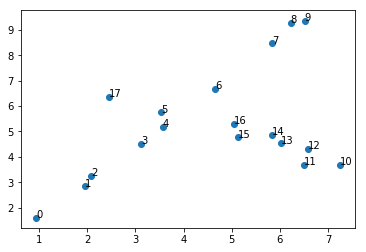

In [14]:
plt.scatter(mdat[:,0], mdat[:,1])
for i in range(mdat.shape[0]):
    plt.annotate(i, (mdat[i,0], mdat[i,1]))
plt.show()

In [13]:
%%timeit
Zm, colorm = bhclust(mdat, family = "multivariate", alpha = 1)
Zm, colorm = bhclust_fast(mdat, family = "multivariate", alpha = 1)

10 loops, best of 3: 46.6 ms per loop


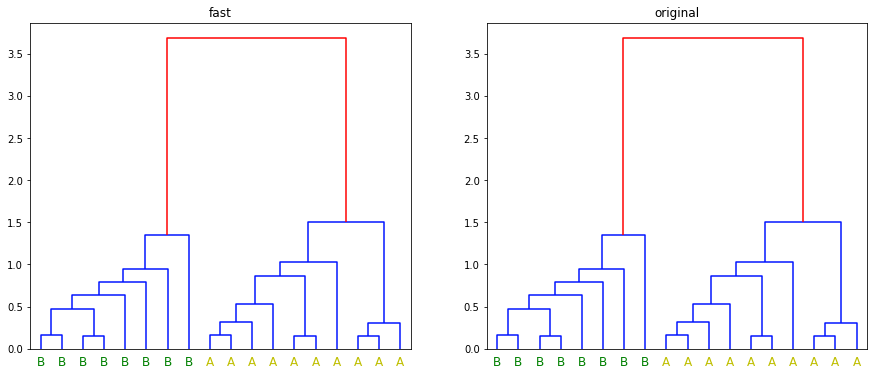

In [27]:
labm = ['A'] * 10 + ['B'] * 8
labcols = {'A': 'y', 'B':'g'}

plt.figure(figsize=(15,6))

plt.subplot(121)
Zm, colorm = bhclust_fast(mdat, family = "multivariate", alpha = 1)
dendrogram(Zm, link_color_func=lambda k : colorm[k], labels = labm)
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for y in xlbls:
    y.set_color(labcols[y.get_text()])
plt.title("fast")

plt.subplot(122)
Zm, colorm = bhclust(mdat, family = "multivariate", alpha = 1)
dendrogram(Zm, link_color_func=lambda k : colorm[k], labels = labm)
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for y in xlbls:
    y.set_color(labcols[y.get_text()])
plt.title("original")

plt.show()

### Spiral data

In [30]:
spi = np.genfromtxt('../tests/spiral.txt')

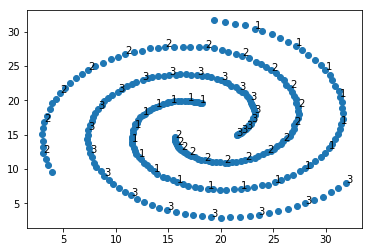

In [35]:
plt.scatter(spi[:,0], spi[:,1])
for i in range(spi.shape[0]):
    if i%5 == 0:
        plt.annotate(spi[i,2].astype('int'), (spi[i,0], spi[i,1]))
plt.show()

In [ ]:
### %%timeit
Zm, colorm = bhclust(mdat, family = "multivariate", alpha = 1)
Zm, colorm = bhclust_fast(mdat, family = "multivariate", alpha = 1)

In [37]:
Zs1, colors1 = bhclust_fast(spi[:,:2], family = "multivariate", alpha = 1, r = 0.1)

In [43]:
Zs2, colors2 = bhclust(spi[:,:2], family = "multivariate", alpha = 1, r = 0.1)

/Users/Hazel/Documents/Biostat/663 Statistical compuatations/bhc/bhc/bhc.py:145: RuntimeWarning: divide by zero encountered in log
  return np.log(ml)
/Users/Hazel/Documents/Biostat/663 Statistical compuatations/bhc/bhc/bhc.py:67: RuntimeWarning: invalid value encountered in double_scalars
  x0.append(x[idx]); d0.append(d[idx]); ml.append(lp1[idx] + log(1+exp(lp2[idx] - lp1[idx])))


KeyboardInterrupt: 

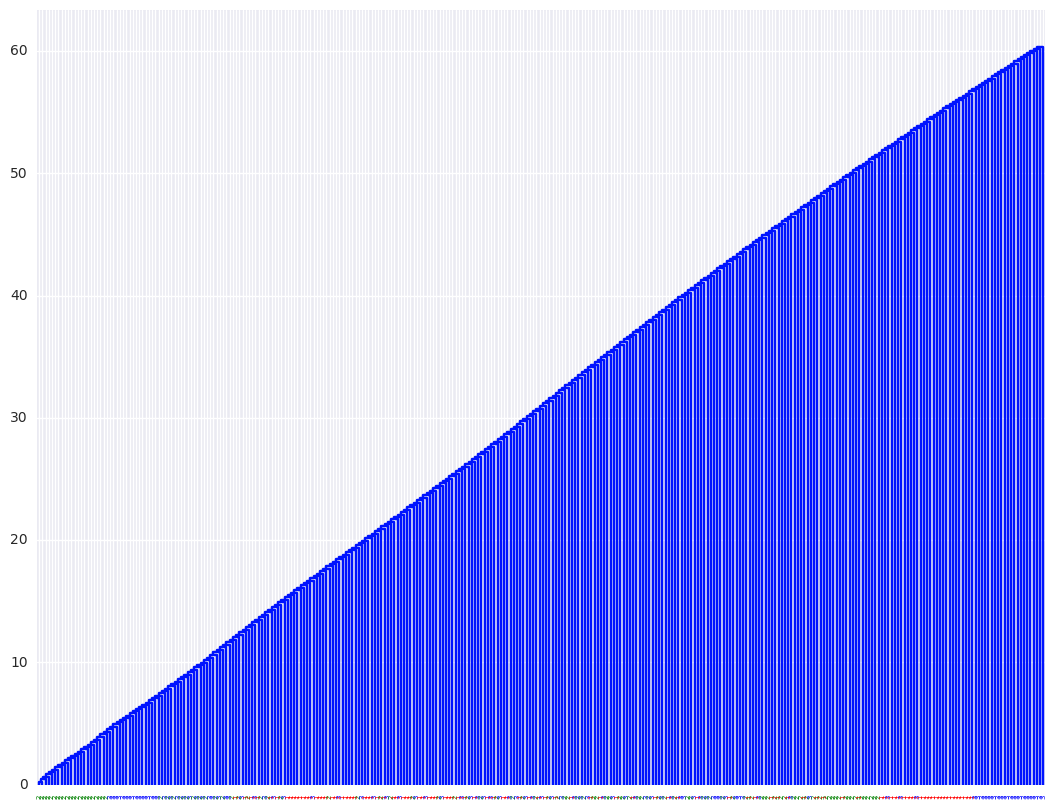

In [20]:
labss = dd[:,2].astype('int').tolist()
labcolss = {'1': 'r', '2':'g', '3':'b'}


plt.figure(figsize=(15,15))

plt.subplot(211)
dendrogram(Zs1, link_color_func=lambda k : colors1[k], labels = labss)
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for y in xlbls:
    y.set_color(labcolss[y.get_text()])
plt.title("fast")

plt.subplot(212)
dendrogram(Zs2, link_color_func=lambda k : colors2[k], labels = labss)
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for y in xlbls:
    y.set_color(labcolss[y.get_text()])
plt.title("fast")
plt.title("original")

plt.show()

### Aggregation data

In [40]:
ag = np.genfromtxt('../tests/aggregation.txt')

In [46]:
# labels
import seaborn as sns
laba = ag[:,2].astype('int').tolist()
labcola = {}
for i in range(7):
    labcola["%d"%(i+1)] = sns.color_palette("Paired", 7)[i]
    
cs = [labcola["%d"%(i)] for i in laba]

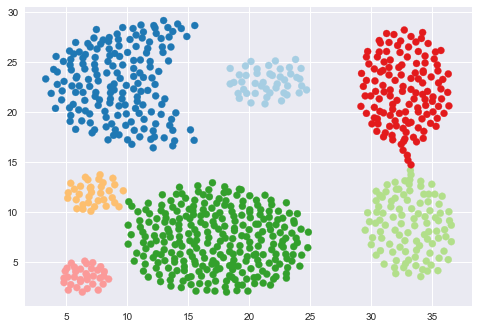

In [48]:
plt.scatter(ag[:,0], ag[:,1], c = cs)
plt.show()

In [49]:
#%%timeit -n 1 -r 1
Za, colora = bhclust(ag[:,:2], family = "multivariate", alpha = 1, r = 0.001)

/Users/Hazel/Documents/Biostat/663 Statistical compuatations/bhc/bhc/bhc.py:145: RuntimeWarning: divide by zero encountered in log
  return np.log(ml)
/Users/Hazel/Documents/Biostat/663 Statistical compuatations/bhc/bhc/bhc.py:140: RuntimeWarning: overflow encountered in double_scalars
  t5num = np.prod(gamma( (vprime - np.arange(k))/2 ) ) * (2 ** (vprime * k / 2))
/Users/Hazel/Documents/Biostat/663 Statistical compuatations/bhc/bhc/bhc.py:143: RuntimeWarning: invalid value encountered in double_scalars
  ml = t1 * t2 * t3 * t4 * (t5num/t5den)


KeyboardInterrupt: 

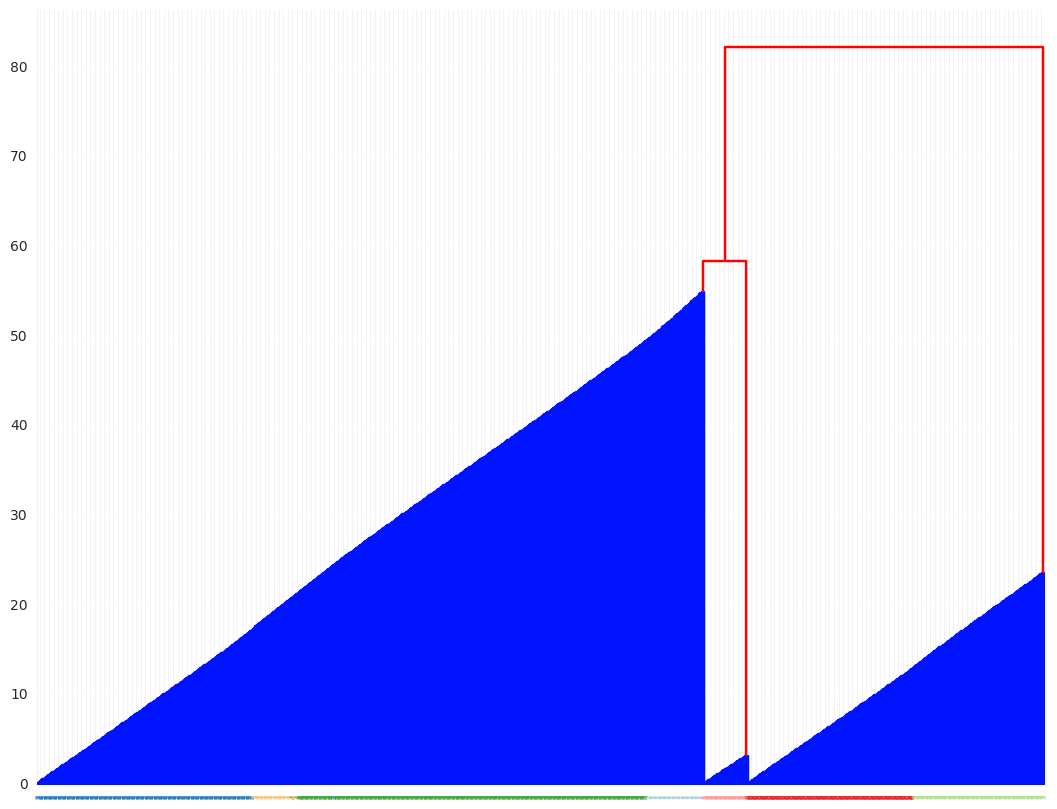

In [30]:
plt.subplots(1,1, figsize = (13, 10))
dendrogram(Za, link_color_func=lambda k : colora[k], labels = laba)
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for y in xlbls:
    y.set_color(labcola[y.get_text()])
plt.show()